In [1]:
import numpy as np
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import zipfile
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [2]:
# Load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

# Load a list of files and return as a 3D numpy array
def load_group(filenames, prefix='D:/가천대학교 3-2/딥러닝/human+activity+recognition+using+smartphones/UCI HAR Dataset/'):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    return np.dstack(loaded)

# Load a dataset group, such as train or test
def load_dataset_group(group, prefix='D:/가천대학교 3-2/딥러닝/human+activity+recognition+using+smartphones/UCI HAR Dataset/'):
    filepath = prefix + group + '/Inertial Signals/'
    filenames = list()
    # Total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # Body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # Body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # Load input data
    X = load_group(filenames, filepath)
    # Load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

# Load the dataset, returns train and test X and y elements
def load_dataset(prefix='D:/가천대학교 3-2/딥러닝/human+activity+recognition+using+smartphones/'):
    # Load all train
    trainX, trainy = load_dataset_group('train', prefix + 'UCI HAR Dataset/')
    # Load all test
    testX, testy = load_dataset_group('test', prefix + 'UCI HAR Dataset/')
    # Zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # One-hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    print("trainX shape: ", trainX.shape)
    print("trainy shape: ", trainy.shape)
    print("testX shape: ", testX.shape)
    print("testy shape: ", testy.shape)
    return trainX, trainy, testX, testy

In [3]:
# Load the dataset
trainX, trainy, testX, testy = load_dataset()

trainX shape:  (7352, 128, 9)
trainy shape:  (7352, 6)
testX shape:  (2947, 128, 9)
testy shape:  (2947, 6)


In [4]:
from tensorflow.keras.layers import GRU

n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
model = Sequential()
model.add(Bidirectional(GRU(100, input_shape=(n_timesteps, n_features))))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))


In [5]:
# Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# Fit the model
batch_size = 64
train_epochs = 10
history = model.fit(trainX, trainy, epochs=train_epochs, batch_size=batch_size, verbose=True, validation_split=0.2)

Epoch 1/10
92/92 [==============================] - 41s 389ms/step - loss: 1.2097 - accuracy: 0.4936 - val_loss: 1.1173 - val_accuracy: 0.5534
Epoch 2/10
92/92 [==============================] - 31s 335ms/step - loss: 0.9262 - accuracy: 0.6128 - val_loss: 1.0231 - val_accuracy: 0.5982
Epoch 3/10
92/92 [==============================] - 31s 332ms/step - loss: 0.6437 - accuracy: 0.7329 - val_loss: 0.5565 - val_accuracy: 0.8083
Epoch 4/10
92/92 [==============================] - 26s 279ms/step - loss: 0.3512 - accuracy: 0.8713 - val_loss: 0.3747 - val_accuracy: 0.8790
Epoch 5/10
92/92 [==============================] - 24s 266ms/step - loss: 0.2468 - accuracy: 0.9065 - val_loss: 0.2328 - val_accuracy: 0.9150
Epoch 6/10
92/92 [==============================] - 25s 272ms/step - loss: 0.1695 - accuracy: 0.9374 - val_loss: 0.2156 - val_accuracy: 0.9286
Epoch 7/10
92/92 [==============================] - 24s 260ms/step - loss: 0.1575 - accuracy: 0.9356 - val_loss: 0.2332 - val_accuracy: 0.9232

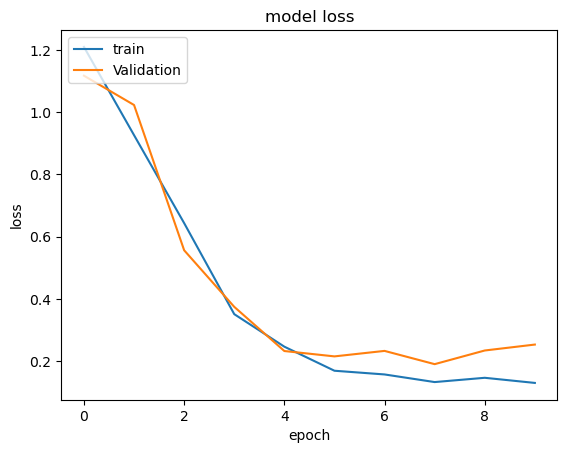

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [8]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
print("Accuracy of the BiLSTM model:", test_accuracy)
# Get the predictions for the test set
predictions = model.predict(testX)

Accuracy of the BiLSTM model: 0.8778418898582458
93/93 [==============================] - 3s 30ms/step


In [9]:
predictions

array([[3.3680480e-03, 1.4875582e-04, 2.1623347e-05, 1.8405085e-03,
        9.9462092e-01, 1.0778671e-07],
       [3.2810185e-03, 1.0881635e-04, 1.1371931e-05, 2.0315489e-03,
        9.9456716e-01, 7.8781575e-08],
       [2.9342098e-03, 1.0477084e-04, 1.1195408e-05, 2.2738064e-03,
        9.9467587e-01, 8.5366878e-08],
       ...,
       [6.7958928e-05, 9.9991047e-01, 1.1982097e-05, 5.9537214e-10,
        7.5403515e-09, 9.4798488e-06],
       [6.9793750e-05, 9.9990666e-01, 1.1460055e-05, 2.9274946e-10,
        1.3410905e-09, 1.2096891e-05],
       [4.7310739e-05, 9.9993742e-01, 7.7114973e-06, 1.3790843e-10,
        6.7080480e-10, 7.5186999e-06]], dtype=float32)

In [10]:
# Confusion Matrix
def display_results(testy,predictions,classNames):
    y_test=np.argmax(testy, axis=1)
    y_scores=np.argmax(predictions, axis=1)
    classes = len(classNames)
    cm = confusion_matrix(y_test, y_scores)
    print("**** Confusion Matrix ****")
    print(cm)
    print("**** Classification Report ****")
    print(classification_report(y_test, y_scores, target_names=classNames))
    con = np.zeros((classes,classes))
    for x in range(classes):
        for y in range(classes):
            con[x,y] = cm[x,y] #/np.sum(cm[x,:])

    plt.figure(figsize=(10,8))
    df = sns.heatmap(con, annot=True, fmt='g', cmap='Blues',xticklabels= classNames , yticklabels= classNames)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

**** Confusion Matrix ****
[[460  19  16   0   1   0]
 [ 36 420  15   0   0   0]
 [ 12  22 386   0   0   0]
 [  2   2   1 375 111   0]
 [  8   0   0  88 436   0]
 [  0  27   0   0   0 510]]
**** Classification Report ****
              precision    recall  f1-score   support

           1       0.89      0.93      0.91       496
           2       0.86      0.89      0.87       471
           3       0.92      0.92      0.92       420
           4       0.81      0.76      0.79       491
           5       0.80      0.82      0.81       532
           6       1.00      0.95      0.97       537

    accuracy                           0.88      2947
   macro avg       0.88      0.88      0.88      2947
weighted avg       0.88      0.88      0.88      2947



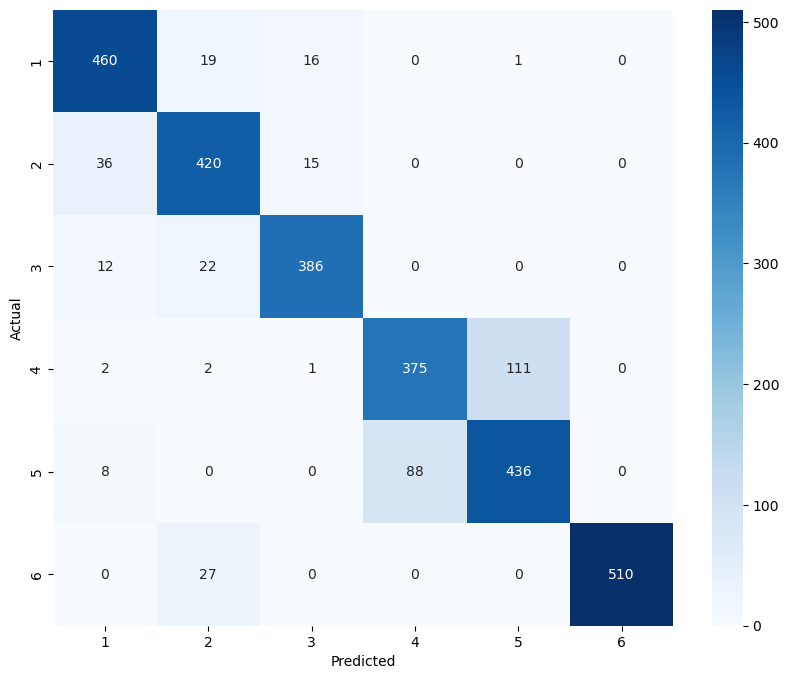

In [11]:
classNames=["1","2","3","4","5","6"]
display_results(testy,predictions,classNames)